##**A First Application: Classifying Iris Species** 
---
####October 22nd,2020.
---
---

**Problem statement:**
Create a model to classify the different species of the Iris flower.

**What is iris flower?**
Iris, (genus Iris), the genus of these flowers has a wide variety of species of plants in the family Iridaceae, including some of the most popular and varied garden flowers in the world. The genus's diversity is centred on the northern temperate zone, although some of its most beautiful species are native to the Mediterranean and areas of Central Asia.
The flowers usually have three sepals, three petals, and three broad pollens.
Iris is the flower family that contains several species such as iris.setosa, iris.versicolor, iris.virginica, etc.



## Parts of Iris Flower

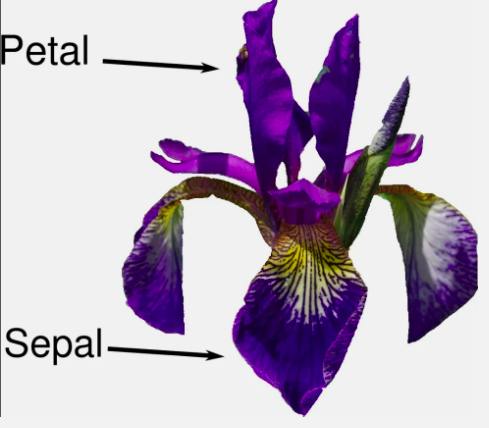

In [73]:
# libraries and version of each one
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


Python version: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
pandas version: 1.1.2
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1


In this part we need to analize the version with we will are working before to start.


**Explanation:**  For this task, the data set provided by the scikit-learn library, which is already collected and structured. The data set contains 50 samples of each of three Iris species (Iris setosa, Iris virginica and Iris versicolor).

## **Meet the Data**

The data used for this example is the Iris data set


In [74]:

from sklearn.datasets import load_iris 
iris_dataset = load_iris()

In [75]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


---

The 'DESCR' key contains the dataset of which the first 250 lines are displayed.

In [76]:
print(iris_dataset['DESCR'][:250] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Informati
...




---


The value of the key 'target_names' is an array of strings, containing the species of the flowers that is desire to predict.

In [77]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


---
The value of 'feature_names' means a list of strings, that gives the description of each characteristic.

In [78]:
print("\nFeature names:  \n{}".format(iris_dataset ['feature_names']))


Feature names:  
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


---

The type of data itself is contained in the 'data' and 'target' that contains the numeric measurements like:
* sepal length
* sepal width 
*petal length 
* petal width 

Everything in a Numpy array

In [79]:
print("Type of data: {}".format(type(iris_dataset['data'])))


Type of data: <class 'numpy.ndarray'>


---
In the data array:
* The rows are made up of the number of flowers whose measurements have been taken.
* Columns representing the four measurements taken for each flower.




In [80]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In other words this means the dataset contains examples of 150 flowers (that called **samples** *in machine learning*) each example containing 4 measurements (called **features**).



---
We can observe the first 10 samples of the feature value







In [81]:
print("First ten columns of data:\n{}".format (iris_dataset ['data'] [:10] ) )

First ten columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


---
When we talk about target array, it contains the species of each of the flowers that were measured, in a numpy array

In [82]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [83]:
print("Shape of target: {}".format(iris_dataset['target'].shape))


Shape of target: (150,)


---
The species in this case are encoded as integers that go 0 to 2:

For this section of the code it's very important to highlight the meaning of the numbers given by the iris 'target_names' array:

* 0 setosa

* 1 versicolor

* 2 virnigica


In [84]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


---
# Training and Testing Data

This part of the code seeks to create a learning model based on the data of the type of flower species to obtain a new set of measurements.
To achieve this, it is necessary to divide the data set into two parts called a **set**. Model training is performed first, and then performance is tested against the test data set. In this case **scikit-learn** contains a function that mixes the data set and divides it into the training and test data sets. This function is called **train_test_split**, which by default, is divided into a proportion of:
 * 75% of the data is provided to the training set.
 * 25% of the data is provided to the test set. 

This relationship can also be changed based on what is needed in your case.

In [85]:
from sklearn.model_selection import train_test_split 


In [86]:
X_train, X_test, y_train, y_test = train_test_split (
    iris_dataset['data'], iris_dataset['target'], random_state=10)

In [87]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))


X_train shape: (112, 4)
y_train shape: (112,)


In [88]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_test shape: (38, 4)
y_test shape: (38,)


---
#  Look at Your Data
Visualizing the data is always a good idea, one way to visualize it is by means of a scatter diagram. The scatter diagram has the function of mapping each characteristic with all other existing characteristics by taking two at a time.

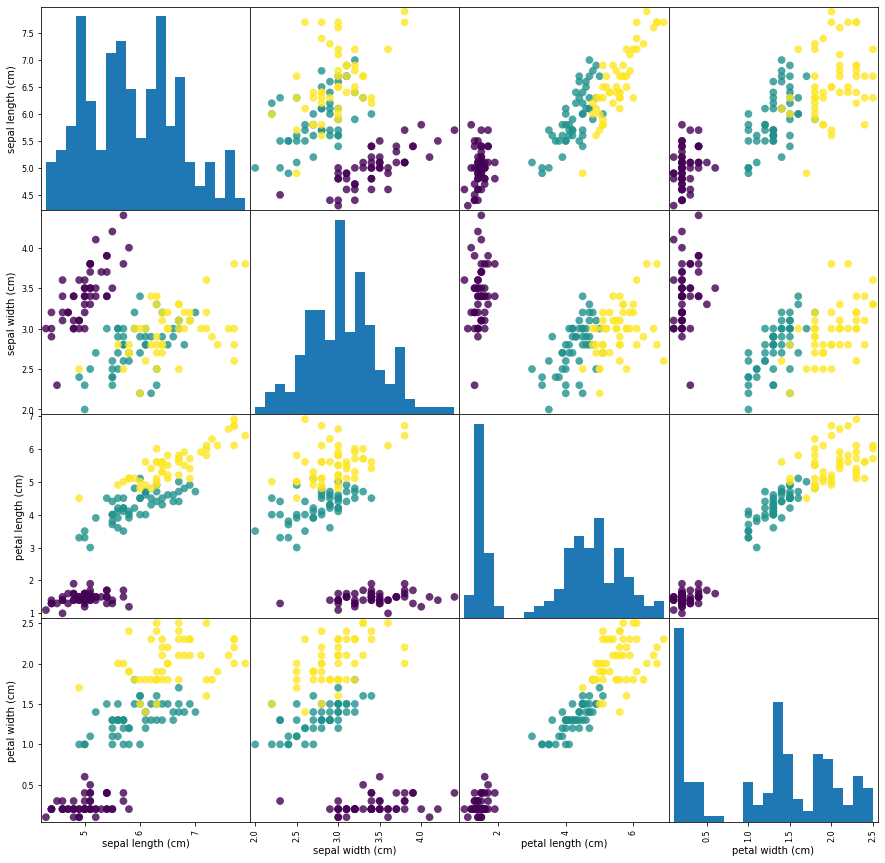

In [89]:
%matplotlib inline
iris_dataset = datasets.load_iris()
X = iris_dataset.data
Y = iris_dataset.target

iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

**%matplotlib inline** this IPython instruction is for the graphics to be included in the page. If not used, the graphics will appear in a separate window.

---
## k-Nearest Neighbors
There are currently many classification algorithms, but the Scikit-learn method can be applied here. An example that is easy to understand better is choosing to work with a classifier of nearest k neighbours, this model of construction emphasizes the storage of the set that is put in the formation. 
To make a prediction for a new data point the algorithm will find the point in the training set that is nearest to the new point. Then we shall proceed to add the mark of this part of the training to the new data point.

In [90]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

The object knn includes: the algorithm that will be used to build the model, from the training data, as well as the algorithm to make the predictions about the new data points, the algorithm will cover information that it has been able to extract from the training data. In the case of KNeighborsClassifier, it stores the training set.
The construction of this model in the training set is called knn object fitting, which takes as arguments
*the NumPy X_train matrix contains: training data
*the NumPy y_train matrix contains: the training labels.


In [91]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

It reflects the parameters used to construct the model in this section of the code. Almost all of these are default values, but you can also notice n neighbors = 1. Most models in scikit-learn have several parameters, but most of them are speed optimizations that are only used in very special cases.

---
##Making Predictions

Predictions can be made using one of these models which has new data but in which there was a possibility that the appropriate labels were unknown. 
To give an example, let us suppose that an iris exists with the following characteristics: 
* 5 cm wide
*Sepal width of 2.9 cm
*Petal length 1 cm
* petal width 0.2 cm

The question in this case would be, what kind of iris would it be?
This would be done by putting data into a NumPy matrix, and recalculating the shape, i.e. the number of samples (1) multiplied by the number of characteristics (4):

In [92]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Scikit-learn always expects two-dimensional matrices for the data.

In [93]:
prediction = knn.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
          iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


This model predicts that this new iris belongs to class 0, which means that its species is setosa.



---


## Evaluating the Model
The test suite that was created earlier will serve to make a prediction for each iris in the test data and compare it with its label (the known species). 

In [94]:

y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]


In [95]:

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


The score method of the knn object, which will compute the test set accuracy

In [96]:

print("Test set score: {:.5f}".format(knn.score(X_test, y_test)))

Test set score: 0.97368


For this model, the test suite accuracy is about 97% of the test suite irises. 

---
##Summary 

The most important points of this homework:
* Create the dataset.
* Build the model
* Train the model
* Make predictions.

The Introduction to machine learning is the most important thing to understand how the formulation of the task predicts to which species of iris a flower belongs. For this specific case, we use a set of measurement data making it a supervised learning task. There were three possible species, setosa, versicolor, or virginica.
Some important words:
* The possible species are called **classes.**
* The single iris species is called its **label.**

The iris data set consists of two:
NumPy matrices: one containing the data, which is called X in scikit-learn, and another containing the correct or desired results called y.


In [97]:

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.4f}".format(knn.score(X_test, y_test)))

Test set score: 0.9737


The classification algorithm of the closest k neighbours in the training set was chosen. This is implemented in the KNeighborsClassifier class. 
The model is built by calling the fitting method, passing the training data (X_train) and the training outputs (y_train) as parameters. The scoring method is applied to the test set data and the set labels and the model has 97% accuracy.


**References**

Müller, A., & Guido, S. (2016). Introduction to machine learning with Python (1st ed., pp. 13-24). O’Reilly Media, Inc.
